In [ ]:
import os

#The OS module in Python provides functions for interacting with the operating system

import numpy as np

#It is a library use to perform Array  related stuff,array related operations or vector related operation.

import pandas as pd

#In order to read the data from system we need data frame

pd.options.mode.chained_assignment = None

# default='warn'

import matplotlib.pyplot as plt

#Matplotlib is mainly deployed for basic plotting. Visualization using Matplotlib generally consists of bars, pies,
#lines, scatter plots and so on.

import seaborn as sns

#It is specfically used for data visualization purpose.
#Seaborn, on the other hand, provides a variety of visualization patterns.
#It uses fewer syntax and has easily interesting default themes.
#It specializes in statistics visualization and is used if one
#has to summarize data in visualizations and also show the distribution in the data.

sns.set_style("darkgrid")

#By default, Seaborn uses the darkgrid style. apply the whitegrid style:

import plotly.express as px

#The plotly.express module (usually imported as px) contains functions that can create entire figures at once,
#and is referred to as Plotly Express or PX. Plotly Express is a built-in part of the plotly library, and
#is the recommended starting point for creating most common figures.
#Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects


In [ ]:
import os
os.listdir("/content/drive/My Drive/SEM-7-Documents/Final-Year-Project/DataSet")

#It is used basically used to list all the files that are present in the folder.

['kaggle.json', 'sample_submission.csv', 'test.csv', 'train.csv']

In [ ]:
train_df = pd.read_csv("/content/drive/My Drive/SEM-7-Documents/Final-Year-Project/DataSet/train.csv")
test_df = pd.read_csv("/content/drive/My Drive/SEM-7-Documents/Final-Year-Project/DataSet/test.csv")
sample_df = pd.read_csv("/content/drive/My Drive/SEM-7-Documents/Final-Year-Project/DataSet/sample_submission.csv")

#Reading all the data that are present as pandas read the data in Csv files
#CSV stands for “Comma Separated Values.” It is the simplest form of storing data in tabular form as plain text.
#With the help of pandas library we can easily import our data set Value.


In [ ]:
train_df["class"] = train_df["target"].map({0:"Not Disaster", 1:"Disaster"})
train_df.sample(5)

#As in the orginal excel file we have just been given the set target value as so '0' and 1 so basically we are cretaing a
#seperate column that tells us wether the text is diaster related or non diaster one
#according to the text values.
#0-Non Diaster
#1-Diaster


,id,keyword,location,text,target,class
2214,3171,deluge,London,Why so many half-naked men on Twitter tonight?...,0,Not Disaster
2557,3666,destroy,UK,#YIAYplan Use my awesome collection of Amiibos...,0,Not Disaster
212,299,annihilated,Boksburg,@marksmaponyane Hey!Sundowns were annihilated ...,0,Not Disaster
4404,6261,hijacking,France,#hot Funtenna: hijacking computers to send da...,0,Not Disaster
7214,10333,weapon,NaN,I'm servicin in my section I'm lurkin I'm with...,0,Not Disaster


In [ ]:
test_df.head()

#The head() function is used to get the first n rows.
#This function returns the first n rows for the object based on position.
# It is useful for quickly testing if your object has the right type of data in it.

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
print(train_df.shape,test_df.shape)

#The shape attribute of pandas. DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns).

(7613, 6) (3263, 4)


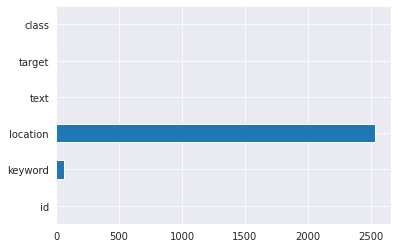

In [ ]:
train_df.isnull().sum().plot(kind = "barh");

# missing values in train data
#isnull(). sum(). sum() returns the number of missing values in the data set.
#We have plotted all the attributes and we can see that location has
#maximum no of missing values and then keyword.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


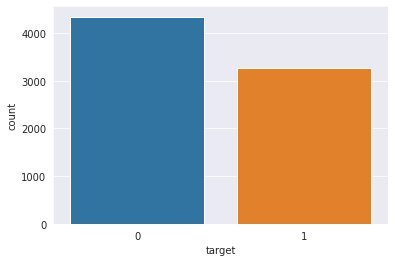

In [ ]:
sns.countplot(train_df['target'])

#seaborn.countplot() method is used to Show the counts of observations in each target bin using bars.

In [ ]:
targets = train_df["target"].value_counts()

fig = px.pie(values = targets,names = ["Not a Disaster","Disaster"], width=530,height=500,
             title= "Distribution of tweets",hover_name=["Not a Disaster","Disaster"],
            )
fig.show()

#.value_counts:count the number of elements in the title column
#Then we have set that attributes and plotted in the form of pie chart.
#Syntax of pie:
#plotly.express.pie(data_frame=None, names=None, values=None, color=None, color_discrete_sequence=None,
# color_discrete_map=None, hover_name=None, hover_data=None,
#custom_data=None, labels=None, title=None, template=None, width=None, height=None, opacity=None, hole=None)

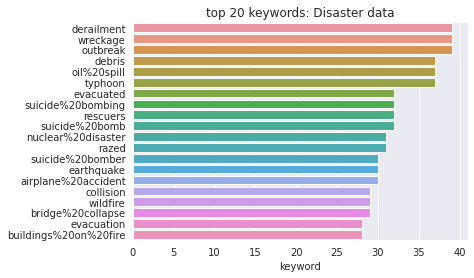

In [ ]:

disaster_kw=train_df['keyword'][train_df.target==1]

#what the most common keywords in the disaster data?

disaster_kw=disaster_kw.value_counts()[0:20]

#convert from words to counts and keep the top 20

sns.barplot(y=disaster_kw.index,x=disaster_kw,orient='h')

plt.title('top 20 keywords: Disaster data')

#Plot Title

plt.show()

#To display the plot


#horizontal bar plot
#Syntax
#seaborn.barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x7ff320f315e0>, ci=95, n_boot=1000,
 #               units=None, seed=None,
  #              orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)¶

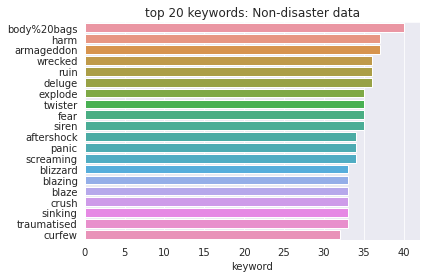

In [ ]:
regular_kw=train_df['keyword'][train_df.target==0]
regular_kw=regular_kw.value_counts()[0:20]
sns.barplot(y=regular_kw.index,x=regular_kw,orient='h')
plt.title('top 20 keywords: Non-disaster data')
plt.show()

#then we have try to find out the most common non diaster data.

In [ ]:
train_df["length"] = train_df.text.str.split().apply(len)
train_df.sample(10)

#The attribute length that we are having so we have taken that attribute and cretaed a new
#class length to find the length of the text and then using spilt function
#Split strings around given separator/delimiter.
#Then .apply(len)function will help us get the length of the string and then we dislpay it.

,id,keyword,location,text,target,class,length
1008,1463,body%20bagging,"Huber Heights, OH",@Drake is body bagging meek meanwhile he's on ...,0,Not Disaster,27
3339,4783,evacuated,"Nashville, TN",Just got evacuated from the movie theatre for ...,1,Disaster,16
586,846,bioterror,Memphis,FedEx not willing to transport research specim...,1,Disaster,18
5136,7325,nuclear%20reactor,NaN,Finnish ministers: Fennovoima nuclear reactor ...,0,Not Disaster,11
426,617,arsonist,ss,@58hif my trick is to think about nasty things,0,Not Disaster,9
5000,7132,military,NY,13 reasons why we love women in the military ...,0,Not Disaster,13
3516,5027,eyewitness,"Terlingua, Texas",#ClimateChange Eyewitness to Extreme Weather: ...,1,Disaster,18
1251,1807,buildings%20on%20fire,UK,#TweetLikeItsSeptember11th2001 Those two build...,1,Disaster,7
3019,4334,dust%20storm,The Harbinger.,@LegacyOfTheSith @SagaciousSaber @Lordofbetray...,0,Not Disaster,19
1495,2157,catastrophe,@UntmdOutdoors #T.O.R.K,Success is not built on success. Its built on ...,0,Not Disaster,19


In [ ]:
fig = px.histogram(train_df, x = "keyword", y = "length",
                   color = "class", opacity=0.8, title="Lenght of tweets according to keywords")
fig.show()

#USing Plotly Library we are trying to  display the length of diaster and non diaster tweets
#x-axis-Keyword
#Yaixs:Length
#Red-Not Diaster
#Blue:Diaster

In [ ]:
d_locations =  train_df[train_df["class"]=="Disaster"].location.value_counts()
nd_locations =  train_df[train_df["class"]=="Not Disaster"].location.value_counts()

#Now Analyzing the data with respect to location and again using value count function.

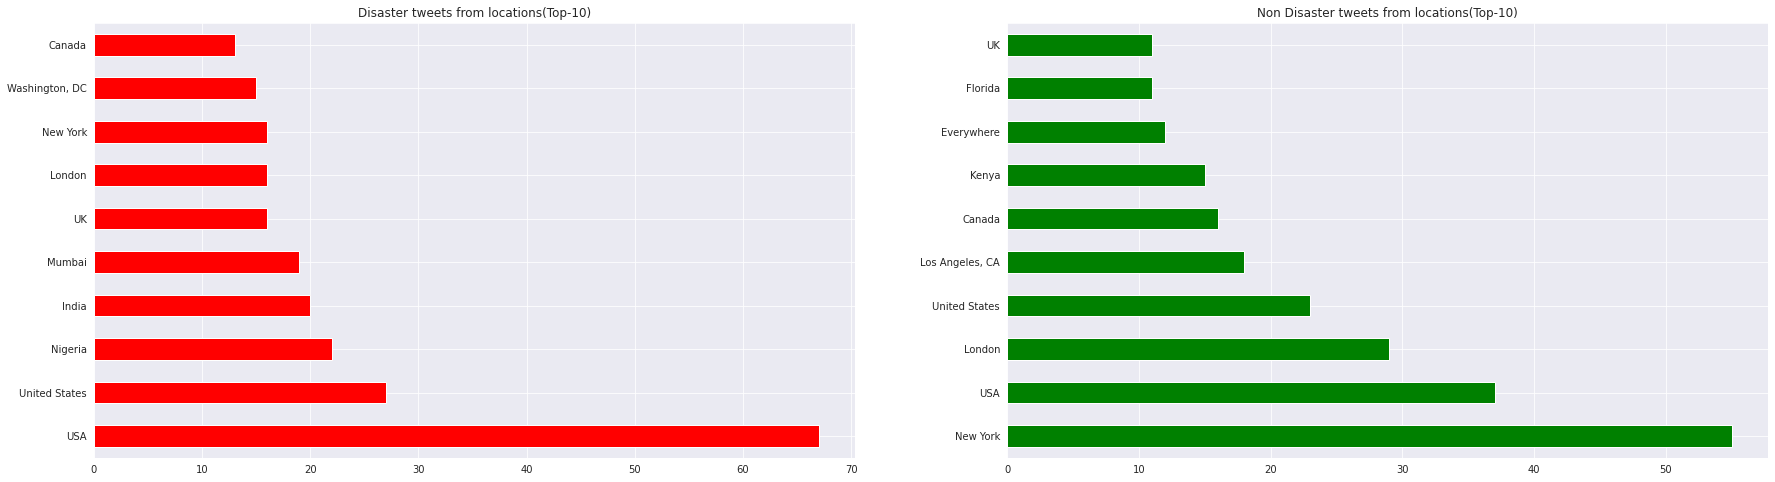

In [ ]:
plt.figure(figsize = [30,8])

plt.subplot(121)
d_locations[:10].plot(kind = "barh", color = "Red")
plt.title("Disaster tweets from locations(Top-10)")

plt.subplot(122)
nd_locations[:10].plot(kind = "barh", color = "Green")
plt.title("Non Disaster tweets from locations(Top-10)");

#Plotting as subplot the diaster and non diaster location
#Top10:Diaster Locations:Canda,WashintngonDc,UKand so on.
#Subplot syntax:

In [ ]:
df_train = train_df[["text","target","class"]]

#Creating train that has 3 parameters text ie basically sentence and class is diaster and non diaster tweet.

In [ ]:
df_train.text[:5]

#Display of first 5 texts from training data set.

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [ ]:
test_df.text[:5]

#Display of first 5 texts from testing data set.

0                   Just happened a terrible car crash
1    Heard about #earthquake is different cities, s...
2    there is a forest fire at spot pond, geese are...
3             Apocalypse lighting. #Spokane #wildfires
4        Typhoon Soudelor kills 28 in China and Taiwan
Name: text, dtype: object

In [ ]:
import re
import string

#For Pattern Matching we have imported re
#Why do we import string in Python?
#In addition to giving you access to potentially useful constants as already mentioned,
#the documentation also points out the Formatter class in the string module, which allows you to create
#and customize your own string formatting behaviors using the same implementation as the built-in format() method.

In [ ]:
def processTextR1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: processTextR1(x)

#Re:Regular Expression
#We are trying to remove unnecessary punctation for that we have defined a function.
#Then we are removing all these and returning a default text.

In [ ]:
df_train["clean_text"] = df_train["text"].apply(round1)
test_df["clean_text"] = test_df["text"].apply(round1)

#Here we are trying clean all the text.
#Round1 is basically for first iteration.

In [ ]:
df_train.clean_text[0]

#Display of clean text in training data set.

'our deeds are the reason of this earthquake may allah forgive us all'

In [ ]:
test_df.clean_text[1]

#Display of clean text in testing data set.

'heard about earthquake is different cities stay safe everyone'

In [ ]:
import nltk
nltk.download("stopwords")

#NLTK is a set of libraries for Natural Language Processing.
#Stop words are commonly used
#words in language like “I”, “a” and “the”, which add little meaning to text when analyzing it
#Once your download is complete, import stopwords from nltk.corpus and use the
#.words() method with “english” as the argument.
#It is a list of 179 stop words in the English language.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

#Installing stopwords.
#It is a part of preprocessing task.
#Stopwords are basically those words that do not contribute much to a meaning of a particluar text.


In [ ]:
stop_words = stopwords.words("english")

#English stopwords

In [ ]:
import nltk
from nltk.stem.snowball import SnowballStemmer

#It is a stemming algorithm.
#It is the process of reducing
#the word to its word stem that affixes to suffixes and prefixes or to roots of words known as a lemma.
#For example – The words care, cared and caring lie under the same stem ‘care’.

In [ ]:
stemmer = SnowballStemmer("english")

#Taking in which language we want to perform stemmer.

In [ ]:
def processTextR2(text, stem = False):
    text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"," ",str(text).lower().strip())
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

round2 = lambda x: processTextR2(x)

#Again defining a stem

In [ ]:
df_train["clean_text"] = df_train["clean_text"].apply(round2)
test_df["clean_text"] = test_df["clean_text"].apply(round2)

#Cleaning the testing and training data Second Iteration.

In [ ]:
from wordcloud import WordCloud,STOPWORDS

#Word Cloud is a data visualization
#technique used for representing text data in which the size of each word indicates its frequency or importance.

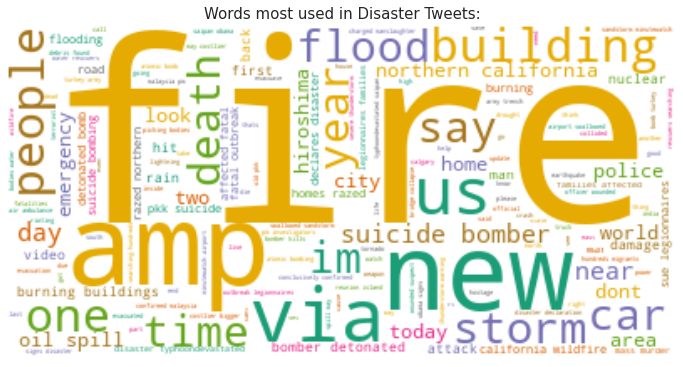

In [ ]:
# Disaster tweets


plt.figure(figsize=(12,10))

wc = WordCloud(stopwords=STOPWORDS, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate("".join(df_train[df_train["class"]=="Disaster"].clean_text))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.title("Words most used in Disaster Tweets:",fontsize=15)
plt.show()


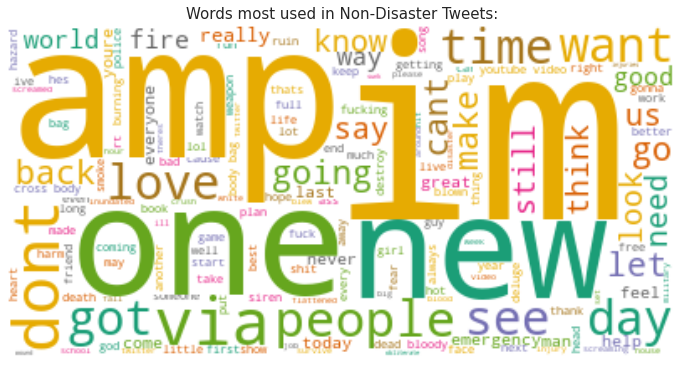

In [ ]:
# Non-Disaster tweets


plt.figure(figsize=(12,10))

wc = WordCloud(stopwords=STOPWORDS, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate("".join(df_train[df_train["class"]=="Not Disaster"].clean_text))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.title("Words most used in Non-Disaster Tweets:",fontsize=15)
plt.show()

In [ ]:
pip install matplotlib-venn

In [ ]:
#Import libraries

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib import pyplot as plt
%matplotlib inline

#%matplotlib inline sets the backend of matplotlib to the 'inline' backend:
#For Dispalying overlapping keywords we have used venn diagrams in both
#Diaster and non diaster tweets.

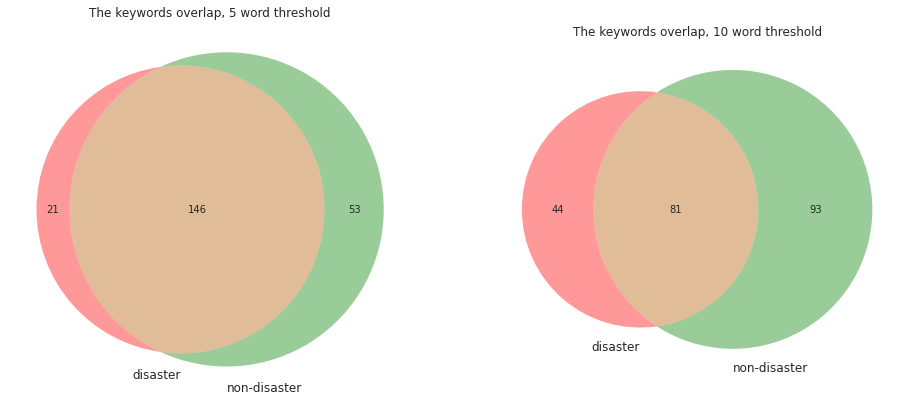

In [ ]:
#to what extent do the keywords overlap between the data sets?

disaster_kw=train_df['keyword'][train_df.target==1]

#convert from words to counts

disaster_kw=disaster_kw.value_counts()
regular_kw=train_df['keyword'][train_df.target==0]
regular_kw=regular_kw.value_counts()


#use the indices to find which words are common to both sets
#a word must appear a certain # of times in each set

th=5

#query which words appear more than 5 times

disaster_kw2=disaster_kw.index[disaster_kw>th]
regular_kw2=regular_kw.index[regular_kw>th]
intersection=np.intersect1d(disaster_kw2,regular_kw2)
n_th5=(len(disaster_kw2)-len(intersection),len(regular_kw2)-len(intersection),len(intersection))

th=10

#higher threshold

disaster_kw2=disaster_kw.index[disaster_kw>th]
regular_kw2=regular_kw.index[regular_kw>th]
intersection=np.intersect1d(disaster_kw2,regular_kw2)

#Intersection

n_th10=(len(disaster_kw2)-len(intersection),len(regular_kw2)-len(intersection),len(intersection))

#Basic set formula AUB=A+B-A(Intersection)B
#show a venn diagram

fig, ax=plt.subplots(1,2, figsize=(16,8))
venn2(subsets=n_th5,set_labels=('disaster','non-disaster'),ax=ax[0])
venn2(subsets=n_th10,set_labels=('disaster','non-disaster'),ax=ax[1])
ax[0].set_title('The keywords overlap, 5 word threshold')
ax[1].set_title('The keywords overlap, 10 word threshold')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)



In [ ]:
X = cv.fit_transform(df_train['clean_text']).toarray()
Y = df_train["target"]

In [ ]:
X_test = cv.transform(test_df["clean_text"]).toarray()

In [ ]:
print(X.shape, X_test.shape)

(7613, 3000) (3263, 3000)


In [ ]:
EMOJIS = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
URLPATTERN        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
USERPATTERN       = '@[^\s]+'
SEQPATTERN   = r"(.)\1\1+"
SEQREPLACE = r"\1\1"

In [ ]:
import re

def preprocess_text(text):

      #text = re.sub(r"http\S+", "", text)
    ### Replacing URL

    text = re.sub(URLPATTERN,' URL',text)

    ### Replacing EMOJI

    for emoji in EMOJIS.keys():
        text = text.replace(emoji, "EMOJI" + EMOJIS[emoji])

    ### Replacing USER pattern
    #text = re.sub(USERPATTERN,' URL',text)
    ### Removing non-alphabets
    #text = re.sub('[^a-zA-z]'," ",text)
    ### Removing consecutive letters
    #text = re.sub(SEQPATTERN,SEQREPLACE,text)
    #text = text.split()
    #text = [wordLemm.lemmatize(word) for word in text if not word in stopwords.words('english') and len(word) > 1]
    #text = ' '.join(text)

    return text

In [ ]:
#Saving the preprocessed text:
train_df['text'] = train_df['text'].apply(preprocess_text)
test_df ['text'] = test_df['text'].apply(preprocess_text)

In [ ]:
#Storing the final output of the diaster related class only.
diaster_df =  train_df[train_df["class"]=="Disaster"]

In [ ]:
#Printing the final outputs of Diaster Text only.
diaster_df.head(15)

,id,keyword,location,text,target,class,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Disaster,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Disaster,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,Disaster,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,Disaster,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Disaster,16
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,Disaster,18
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,Disaster,14
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,Disaster,15
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,Disaster,12
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,Disaster,10


In [ ]:
#Export as download if in colab
from google.colab import files
diaster_df.to_csv( 'Diaster-Tweets_from_train.csv', sep='\t')
files.download( 'Diaster-Tweets_from_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, random_state = 21, test_size = 0.2)

In [ ]:
models  = {
    "LogisticRegression" : make_pipeline(LogisticRegression()),
        "RandomForestClassifier" : make_pipeline(RandomForestClassifier()),
       }

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%time

fit_models = {}
for algo,pipeline in models.items():
    model = pipeline.fit(x_train,y_train)
    fit_models[algo] = model

CPU times: user 50.5 s, sys: 678 ms, total: 51.2 s
Wall time: 54.9 s


In [ ]:
fit_models

{'LogisticRegression': Pipeline(steps=[('logisticregression', LogisticRegression())]),
 'RandomForestClassifier': Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])}

In [ ]:
for model in fit_models:
    print(f" {model} : {fit_models[model].score(x_train,y_train)*100}%")

 LogisticRegression : 90.22988505747126%
 RandomForestClassifier : 98.12807881773399%


In [ ]:
# test
scores = {}
for model in fit_models:
    print(f" {model} : {fit_models[model].score(x_test,y_test)*100:.2f}%")
    scores[model] = fit_models[model].score(x_test,y_test)

 LogisticRegression : 81.81%
 RandomForestClassifier : 78.07%


In [ ]:
fig = px.bar(y = list(scores.values()),color=list(scores.keys()),hover_name=list(scores.values()))
fig.show()